In [100]:
#importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [101]:
# reading the dataset
train_df = pd.read_csv(r"G:\MangeshDataScience\Practice\WorkEx\Classification\Mobile Price Prediction\train_data.csv")

In [102]:
train_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,742,0,2.2,1,4,0,56,0.2,190,...,577,1359,3557,16,11,12,0,1,1,3
1,1,1509,0,0.6,1,5,0,50,0.3,81,...,1010,1684,1540,12,8,3,1,1,0,1
2,2,641,1,1.1,0,0,1,7,0.9,192,...,417,759,3595,7,5,19,1,1,1,2
3,3,733,1,0.6,1,0,0,63,0.3,105,...,950,1739,984,17,4,9,1,0,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,...,294,1233,1069,18,6,14,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1795,667,1,0.6,0,6,1,3,0.7,185,...,13,1463,2855,5,0,19,1,0,1,2
1796,1796,1595,1,2.6,0,7,0,12,0.3,121,...,344,655,3608,15,1,16,0,1,0,3
1797,1797,1641,0,1.1,0,6,0,48,0.7,97,...,224,1994,1695,13,6,17,1,0,1,2
1798,1798,1913,1,1.8,0,0,0,29,0.6,111,...,675,742,2023,17,13,8,1,1,0,2


### Splitting the dataset into independent and dependent variables

In [103]:
X = train_df.drop(['price_range'], axis=1)
y = train_df.price_range

In [104]:
from sklearn.metrics import plot_confusion_matrix

### train test split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [106]:
print('Shape of {}'.format(X_train.shape))
print('Shape of {}'.format(X_test.shape))

Shape of (1350, 21)
Shape of (450, 21)


### Building the evaluation matrix

In [107]:
def print_score1(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Training Result:========================================================')
        print(f'The accuracy score for the model is: {accuracy_score(y_train,pred )*100: .2f}%')
        print('________________________________________________________________________')
        print(f'The classification report for the model is: \n{clf_report}')
        print('________________________________________________________________________')
        plot_confusion_matrix(clf,X_train, y_train, cmap='viridis')
        print('========================================================================')
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print('Training Result:========================================================')
        print(f'The accuracy score for the model is: {accuracy_score(y_test,pred )*100: .2f}%')
        print('________________________________________________________________________')
        print(f'The classification report for the model is: \n{clf_report}')
        print('________________________________________________________________________')
        plot_confusion_matrix(clf, X_test, y_test, cmap='cividis')
        plt.show()

## Building & Evaluating Various Models

### 1. Logistic Regression

In [108]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Training Result:========================================================
The accuracy score for the model is:  65.78%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.843949    0.583082    0.507837    0.694301  0.657778   
recall       0.795796    0.581325    0.480712    0.770115  0.657778   
f1-score     0.819165    0.582202    0.493902    0.730245  0.657778   
support    333.000000  332.000000  337.000000  348.000000  0.657778   

             macro avg  weighted avg  
precision     0.657292      0.657315  
recall        0.656987      0.657778  
f1-score      0.656379      0.656773  
support    1350.000000   1350.000000  
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  63.11%
______________________

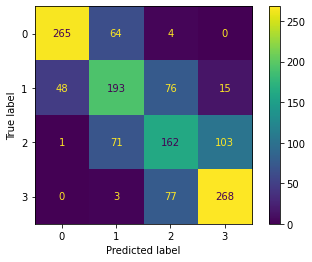

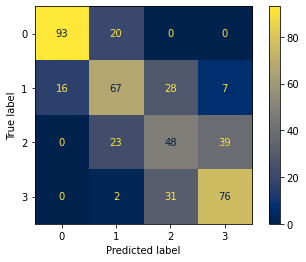

In [109]:
print_score1(log_reg, X_train, y_train, X_test, y_test, train = True)
print_score1(log_reg, X_train, y_train, X_test, y_test, train = False)

### 3. Decision Tree

Training Result:========================================================
The accuracy score for the model is:  100.00%
________________________________________________________________________
The classification report for the model is: 
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    333.0  332.0  337.0  348.0       1.0     1350.0        1350.0
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  87.78%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.897

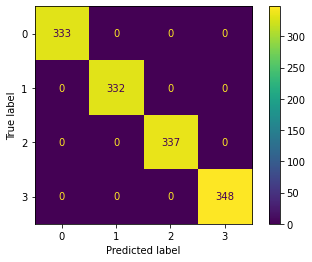

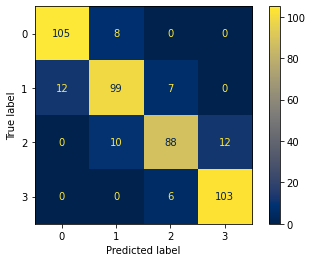

In [110]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print_score1(dtree,X_train,y_train, X_test, y_test, train=True)
print_score1(dtree,X_train,y_train, X_test, y_test, train=False)

### 3. Random Forest Model

Training Result:========================================================
The accuracy score for the model is:  100.00%
________________________________________________________________________
The classification report for the model is: 
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    333.0  332.0  337.0  348.0       1.0     1350.0        1350.0
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  87.78%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.897

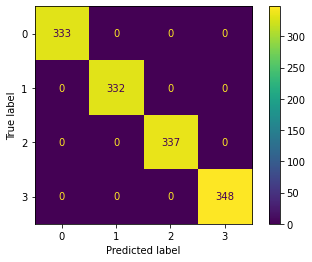

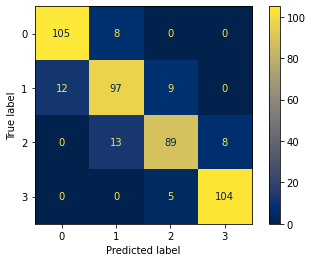

In [111]:
rf = RandomForestClassifier().fit(X_train, y_train)
print_score1(rf, X_train, y_train, X_test, y_test, train = True)
print_score1(rf, X_train, y_train, X_test, y_test, train = False)

### 4. Support Vector Machines

Training Result:========================================================
The accuracy score for the model is:  94.96%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.976119    0.937685    0.938080    0.946479   0.94963   
recall       0.981982    0.951807    0.899110    0.965517   0.94963   
f1-score     0.979042    0.944694    0.918182    0.955903   0.94963   
support    333.000000  332.000000  337.000000  348.000000   0.94963   

             macro avg  weighted avg  
precision     0.949591      0.949531  
recall        0.949604      0.949630  
f1-score      0.949455      0.949438  
support    1350.000000   1350.000000  
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  94.44%
______________________

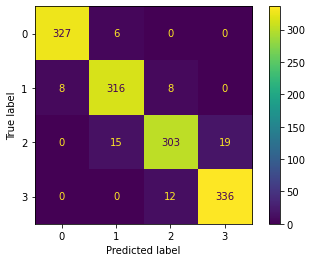

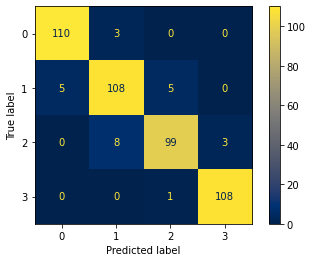

In [112]:
svc = SVC().fit(X_train, y_train)
print_score1(svc, X_train, y_train, X_test, y_test, train=True)
print_score1(svc, X_train, y_train, X_test, y_test, train=False)

### 5. Naive Bayes Classifier

Training Result:========================================================
The accuracy score for the model is:  82.07%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.921450    0.740299    0.715942    0.908555  0.820741   
recall       0.915916    0.746988    0.732938    0.885057  0.820741   
f1-score     0.918675    0.743628    0.724340    0.896652  0.820741   
support    333.000000  332.000000  337.000000  348.000000  0.820741   

             macro avg  weighted avg  
precision     0.821561      0.822275  
recall        0.820225      0.820741  
f1-score      0.820824      0.821438  
support    1350.000000   1350.000000  
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  78.89%
______________________

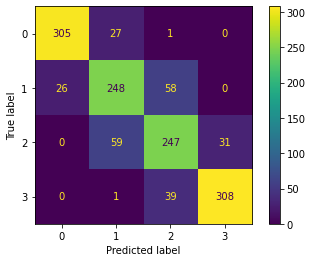

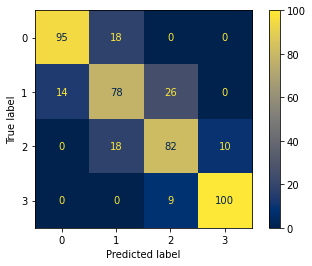

In [113]:
nb = GaussianNB().fit(X_train, y_train)
print_score1(nb, X_train, y_train, X_test, y_test, train=True)
print_score1(nb, X_train, y_train, X_test, y_test, train=False)

### 6. Decision Tree with Hyperparameter Tunning

In [114]:
params = {"criterion":("gini", "entropy"),
"splitter":("best", "random"),
"max_depth":(list(range(1,10))),
"min_samples_split":[2, 3, 4],
"min_samples_leaf":list(range(1, 20))}
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="precision", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score1(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score1(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 2052 candidates, totalling 10260 fits


KeyboardInterrupt: 

### 7. AdaBoost Classifier

Training Result:========================================================
The accuracy score for the model is:  81.41%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.914179    0.715347    0.795796    0.869565  0.814074   
recall       0.735736    0.870482    0.786350    0.862069  0.814074   
f1-score     0.815308    0.785326    0.791045    0.865801  0.814074   
support    333.000000  332.000000  337.000000  348.000000  0.814074   

             macro avg  weighted avg  
precision     0.823722      0.824229  
recall        0.813659      0.814074  
f1-score      0.814370      0.814894  
support    1350.000000   1350.000000  
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  80.00%
______________________

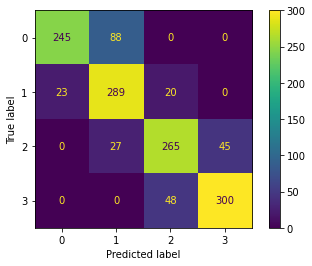

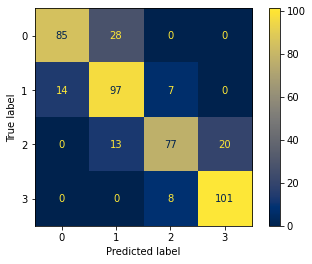

In [ ]:
adbup = AdaBoostClassifier().fit(X_train, y_train)
print_score1(adbup, X_train, y_train, X_test, y_test, train=True)
print_score1(adbup, X_train, y_train, X_test, y_test, train=False)

### 8. Gradient Boosting

Training Result:========================================================
The accuracy score for the model is:  100.00%
________________________________________________________________________
The classification report for the model is: 
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    333.0  332.0  337.0  348.0       1.0     1350.0        1350.0
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  91.56%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.913

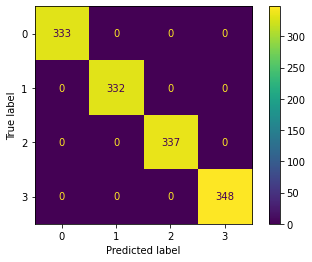

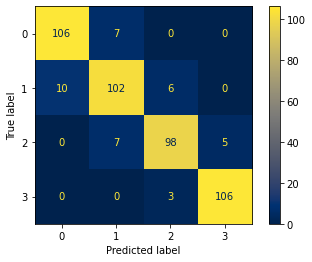

In [ ]:
gbx = GradientBoostingClassifier().fit(X_train, y_train)
print_score1(gbx, X_train, y_train, X_test, y_test, train=True)
print_score1(gbx, X_train, y_train, X_test, y_test, train=False)

### 9. XGBoost

Training Result:========================================================
The accuracy score for the model is:  100.00%
________________________________________________________________________
The classification report for the model is: 
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    333.0  332.0  337.0  348.0       1.0     1350.0        1350.0
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  91.78%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.922

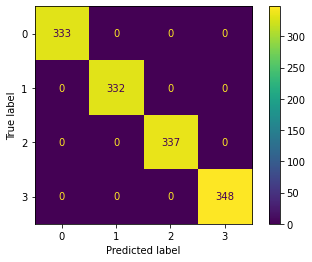

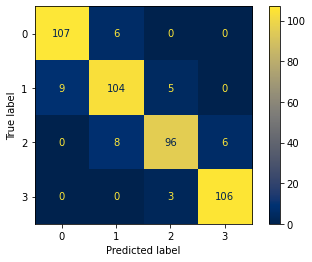

In [ ]:
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, y_train)
print_score1(xgb, X_train, y_train, X_test, y_test, train=True)
print_score1(xgb, X_train, y_train, X_test, y_test, train=False)

### 10. KNN

Text(0, 0.5, 'Error Rate')

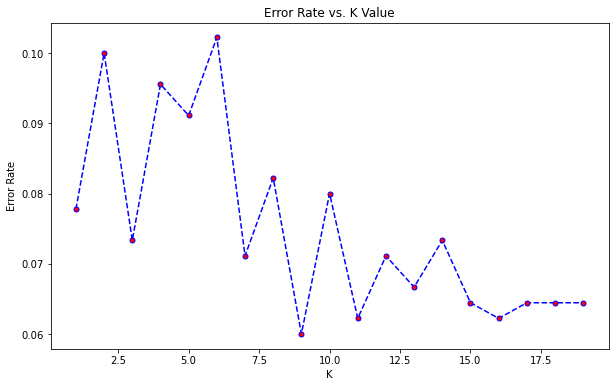

In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Training Result:========================================================
The accuracy score for the model is:  94.44%
________________________________________________________________________
The classification report for the model is: 
                    0           1           2           3  accuracy  \
precision    0.961765    0.926686    0.916914    0.972892  0.944444   
recall       0.981982    0.951807    0.916914    0.928161  0.944444   
f1-score     0.971768    0.939079    0.916914    0.950000  0.944444   
support    333.000000  332.000000  337.000000  348.000000  0.944444   

             macro avg  weighted avg  
precision     0.944564      0.944810  
recall        0.944716      0.944444  
f1-score      0.944440      0.944424  
support    1350.000000   1350.000000  
________________________________________________________________________
Training Result:========================================================
The accuracy score for the model is:  92.00%
______________________

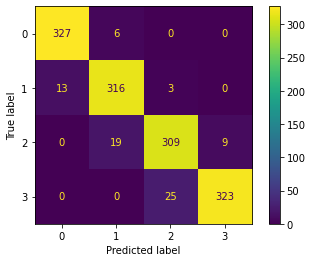

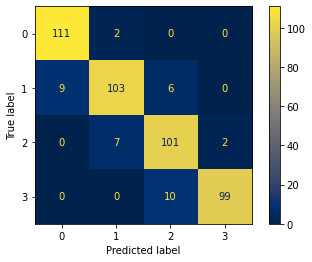

In [ ]:
print_score1(knn, X_train, y_train, X_test, y_test, train=True)
print_score1(knn, X_train, y_train, X_test, y_test, train=False)

In [ ]:
import joblib
joblib.dump(knn,'KNNMobPricePred.pkl')

['KNNMobPricePred.pkl']

## Price Prediction for the test dataset

In [118]:
#Importing the dataset
test_df = pd.read_csv(r"G:\MangeshDataScience\Practice\WorkEx\Classification\Mobile Price Prediction\test_data.csv")

In [119]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,1445,1,0.5,0,0,0,53,0.7,174,...,14,386,836,1099,17,1,20,1,0,0
1,1,595,0,0.9,1,7,1,23,0.1,121,...,17,441,810,3752,10,2,18,1,1,0
2,2,1131,1,0.5,1,11,0,49,0.6,101,...,18,658,878,1835,19,13,16,1,1,0
3,3,1949,0,2.6,1,4,0,47,0.3,199,...,7,407,822,1433,11,5,20,0,0,1
4,4,956,0,0.5,0,1,1,41,1.0,143,...,6,511,1075,3286,17,8,12,1,1,0


In [120]:
data_test = test_df.drop(['id'], axis =1)

In [ ]:
# Loading the model
model = joblib.load('G:\MangeshDataScience\Practice\WorkEx\Classification\Mobile Price Prediction\KNNMobPricePred.pkl')

In [122]:
# Testing the model
predicted_price = model.predict(data_test)

In [123]:
predicted_price

array([0, 3, 1, 1, 3, 2, 0, 3, 1, 3, 0, 3, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       3, 3, 2, 1, 3, 0, 3, 0, 3, 3, 1, 0, 0, 3, 2, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 3, 0, 0, 2, 3, 2, 0, 1, 3, 1, 2, 2, 3, 0, 0, 1, 2, 1, 1,
       0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 3,
       3, 0, 0, 1, 3, 1, 3, 2, 0, 0, 2, 1, 3, 3, 0, 3, 1, 0, 2, 2, 2, 2,
       0, 1, 2, 3, 3, 3, 0, 3, 0, 1, 0, 1, 0, 1, 3, 0, 1, 2, 0, 3, 0, 2,
       3, 2, 2, 2, 2, 3, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 3, 0, 3,
       0, 1, 1, 0, 3, 3, 2, 2, 2, 3, 1, 0, 2, 1, 1, 1, 1, 3, 2, 2, 2, 0,
       1, 0, 3, 2, 0, 1, 1, 1, 3, 3, 1, 0, 3, 2, 3, 0, 1, 3, 2, 3, 1, 1,
       1, 0], dtype=int64)

In [124]:
# Adding predicted price to test_csv
test_df['price_range'] = predicted_price

In [125]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1445,1,0.5,0,0,0,53,0.7,174,...,386,836,1099,17,1,20,1,0,0,0
1,1,595,0,0.9,1,7,1,23,0.1,121,...,441,810,3752,10,2,18,1,1,0,3
2,2,1131,1,0.5,1,11,0,49,0.6,101,...,658,878,1835,19,13,16,1,1,0,1
3,3,1949,0,2.6,1,4,0,47,0.3,199,...,407,822,1433,11,5,20,0,0,1,1
4,4,956,0,0.5,0,1,1,41,1.0,143,...,511,1075,3286,17,8,12,1,1,0,3


In [126]:
submission_df = test_df[['id', 'price_range']]

In [132]:
submission_df.to_csv("G:\MangeshDataScience\Practice\WorkEx\Classification\Mobile Price Prediction\submission_sample.csv")